In [1]:
import pandas as pd

In [4]:
df = pd.read_excel("../data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Data Cleaning

In [8]:
# Bersihkan data yang tidak memiliki CustomerID
df.dropna(subset=["CustomerID"], inplace=True)

In [9]:
# Ambil transaksi positif
df = df[df["Quantity"] > 0]

In [10]:
# Drop duplikat
df.drop_duplicates(inplace=True)

# Feature Engineering dengan RFM

Model RFM =
- Recency: Seberapa baru customer belanja
- Frequency: Seberapa sering dia belanja
- Monetary: Seberapa banyak uang yang dia habiskan

Ini pendekatan yang umum dipakai bisnis buat ngelompokkan pelanggan.

In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
# Tentukan tanggal snapshot
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [15]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [17]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
})
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)


In [21]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


# Clustering

In [30]:
!pip install scikit-learn

You should consider upgrading via the 'c:\college\sem 6\project\customer-segmentation-project\env\scripts\python.exe -m pip install --upgrade pip' command.


In [33]:
# Normalisasi data RFM menggunakan Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Ubah hasil scaling jadi DataFrame biar enak dibaca
import pandas as pd
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm.columns, index=rfm.index)
rfm_scaled_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.871314,0.000000,0.275453
12347.0,0.002681,0.028708,0.015382
12348.0,0.198391,0.014354,0.006414
12349.0,0.048257,0.000000,0.006272
12350.0,0.828418,0.000000,0.001193


In [34]:
!pip install matplotlib

You should consider upgrading via the 'c:\college\sem 6\project\customer-segmentation-project\env\scripts\python.exe -m pip install --upgrade pip' command.


c:\College\Sem 6\Project\Customer-Segmentation-Project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\College\Sem 6\Project\Customer-Segmentation-Project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\College\Sem 6\Project\Customer-Segmentation-Project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\College\Sem 6\Project\Customer-Segmentation-Project\env\lib\site-packa

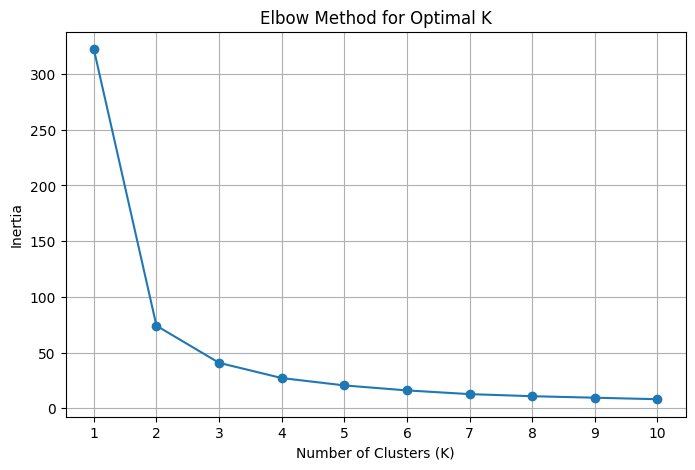

In [35]:
# Nentuin jumlah cluster pake Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simpan nilai inertia (jarak total ke pusat cluster) untuk tiap K
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

In [49]:
# Jalankan KMeans dengan K = 2
kmeans = KMeans(n_clusters=2, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled_df)

# Lihat hasil clustering
rfm.groupby('Cluster').mean()

c:\College\Sem 6\Project\Customer-Segmentation-Project\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary
Cluster,,,
0,41.453933,5.143251,2507.637053
1,248.140858,1.616604,648.095747


Hasil Segmentasi:
- Cluster 0 terdiri dari pelanggan loyal yang terakhir melakukan pembelian sekitar 41 hari yang lalu, dengan frekuensi rata-rata 5 transaksi dan total pengeluaran yang cukup tinggi.
- Cluster 1 mencerminkan pelanggan yang tidak aktif, dengan rata-rata terakhir bertransaksi 248 hari yang lalu, hanya melakukan 1–2 transaksi, dan memiliki pengeluaran yang relatif rendah.

# Visualisasi

In [37]:
!pip install seaborn

You should consider upgrading via the 'c:\college\sem 6\project\customer-segmentation-project\env\scripts\python.exe -m pip install --upgrade pip' command.


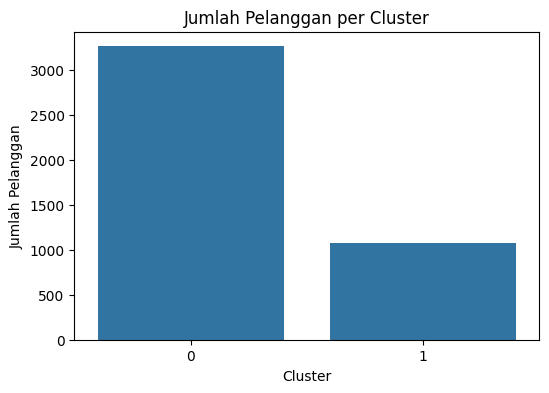

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan kembali kolom cluster ke dataframe asli
rfm['Cluster'] = kmeans.labels_

# Plot ukuran cluster (jumlah customer per cluster)
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=rfm)
plt.title('Jumlah Pelanggan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.show()

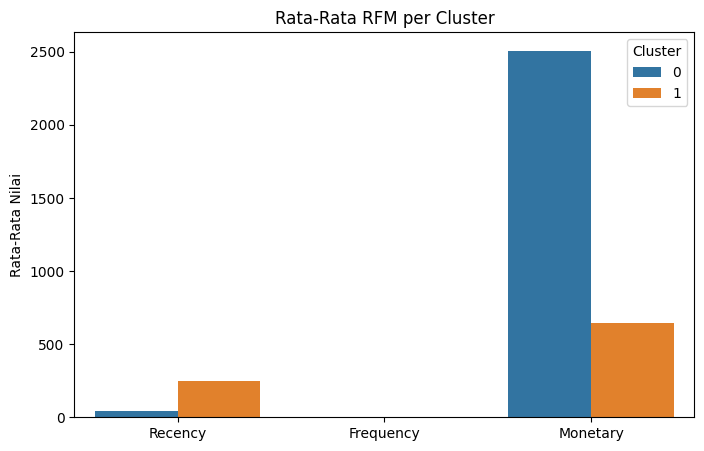

In [41]:
# Group by cluster dan hitung mean
cluster_avg = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Melt biar bentuknya long-format
rfm_melted = cluster_avg.melt(id_vars='Cluster', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', hue='Cluster', data=rfm_melted)
plt.title('Rata-Rata RFM per Cluster')
plt.ylabel('Rata-Rata Nilai')
plt.xlabel('')
plt.show()

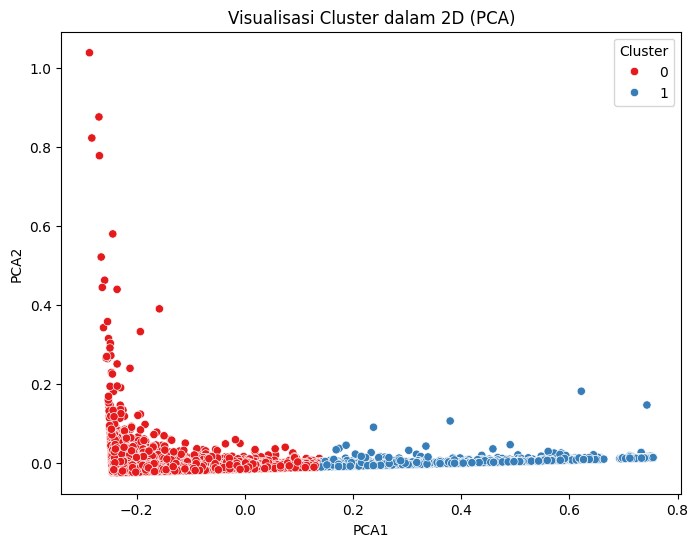

In [50]:
from sklearn.decomposition import PCA

# Reduce dimensionality
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Gabung ke dataframe
rfm_clustered = rfm.copy()
rfm_clustered['PCA1'] = pca_components[:, 0]
rfm_clustered['PCA2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Visualisasi Cluster dalam 2D (PCA)')
plt.show()
